# NFL Verse Analysis

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nfl_data_py as nfl
import seaborn as sns

In [192]:
# Run only once to download the data then commment out.
# years = range(2010, 2024)

# # Get the play-by-play data
# pbp = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)

# # Schedule
# s = nfl.import_schedules(years)

Exploration of the datasets

In [193]:
# pbp = pd.read_csv('../data/raw/NFL_verse_pbp_data.csv', low_memory=False)
# s = pd.read_csv('../data/raw/NFL_verse_schedules.csv')

# print(f"PBP has {pbp.shape[0]} rows and {pbp.shape[1]} columns")
# print(f"Schedule has {s.shape[0]} rows and {s.shape[1]} columns")


Create an injury column from the box score description

In [194]:
pbp['Injury'] = pbp['desc'].str.contains('injur')

In [195]:
print(f"Number of injuries: {pbp['Injury'].sum()}, between 2010 and 2023")

# Print out the number of games
print(f"Number of games: {pbp['game_id'].nunique()}")

Number of injuries: 11306, between 2010 and 2023
Number of games: 3793


Select the data relevant to the analysis

In [196]:
pbp_selected = pbp[['play_id','game_id','home_team','away_team','season_type','week','posteam',
'posteam_type','defteam','side_of_field','yardline_100','game_date',
'quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining',
'game_half','quarter_end','drive','sp','qtr','down','goal_to_go',
'time','yrdln','ydstogo','ydsnet','desc','play_type',
'yards_gained','shotgun','no_huddle','qb_dropback','qb_kneel','qb_spike','qb_scramble',
'pass_length','pass_location','air_yards','yards_after_catch','run_location',
'run_gap','field_goal_result','extra_point_result','two_point_conv_result','home_timeouts_remaining','away_timeouts_remaining','timeout',
'total_home_score','total_away_score','score_differential','Injury']]

Now we need to merge the dataframes to get the stats for each game such as weatger and field type

In [197]:
combined_data = pd.merge(pbp_selected,s,on=['game_id','week','home_team','away_team'],how='left')
# Display injuries by year

combined_data['game_date'] = pd.to_datetime(combined_data['game_date'])
# Extract the year from the game_date
combined_data['year'] = combined_data['game_date'].dt.year


In [198]:
# Drop 2024 data
combined_data = combined_data[combined_data['year'] != 2024]
injuries_by_year = combined_data.groupby('year')['Injury'].sum()

/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_9421/347696032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=injuries_by_year.index, y=injuries_by_year.values, palette='viridis')


Text(0, 0.5, 'Number of Injuries')

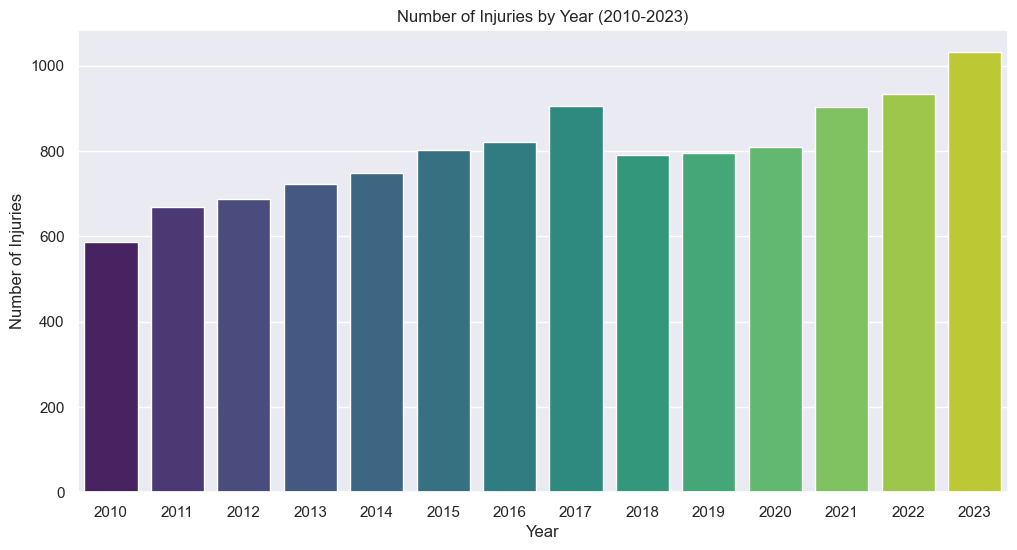

In [199]:
# Plot the injuries by year
plt.figure(figsize=(12, 6))
sns.barplot(x=injuries_by_year.index, y=injuries_by_year.values, palette='viridis')
plt.title('Number of Injuries by Year (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')

In [200]:
combined_data['surface'].value_counts()

surface
grass         314216
fieldturf     163689
sportturf      40224
matrixturf     28899
astroturf      17219
grass          16231
a_turf         15344
astroplay       1445
Name: count, dtype: int64

Surface has too many values, so we need to classify them into grass and turf

In [201]:
combined_data['surface'].replace('a_turf','fieldturf',inplace=True)
combined_data['surface'].replace('astroplay','fieldturf',inplace=True)
combined_data['surface'].replace('sportturf','fieldturf',inplace=True)
combined_data['surface'].replace('matrixturf','fieldturf',inplace=True)
combined_data['surface'].replace('astroturf','fieldturf',inplace=True)
combined_data['surface'].replace('grass ','grass',inplace=True)
combined_data['surface'].replace('dessograss','fieldturf',inplace=True)
combined_data['surface'].value_counts()

/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_9421/1820590482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['surface'].replace('a_turf','fieldturf',inplace=True)
/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_9421/1820590482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

surface
grass        330447
fieldturf    266820
Name: count, dtype: int64

In the box description we need to extract the severity of the injury

/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_9421/1275706035.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=injuries_by_surface.index, y=injuries_by_surface.values, palette='viridis')


Text(0, 0.5, 'Number of Injuries')

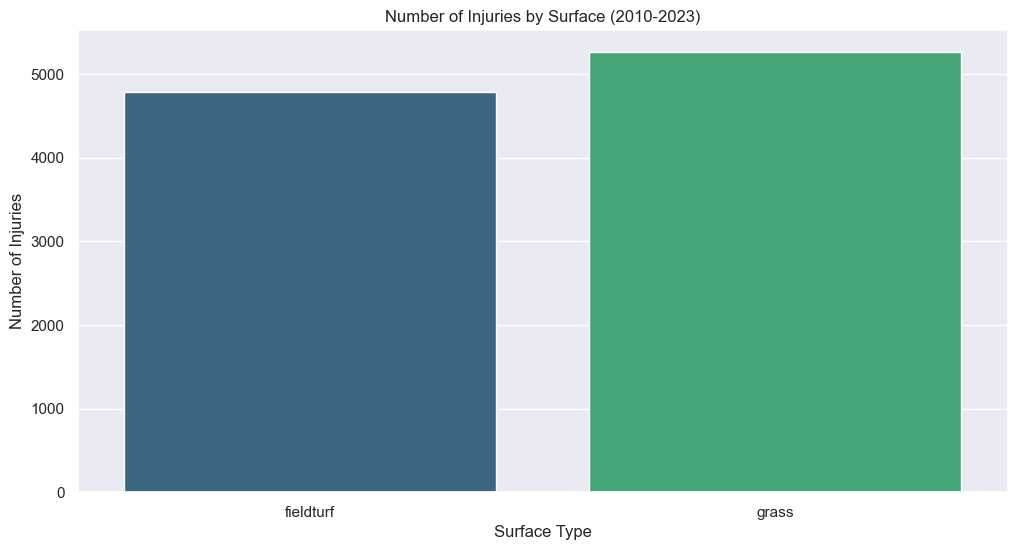

In [202]:
# Display injuries by surface
injuries_by_surface = combined_data.groupby('surface')['Injury'].sum()

# Plot the injuries by surface
plt.figure(figsize=(12, 6))
sns.barplot(x=injuries_by_surface.index, y=injuries_by_surface.values, palette='viridis')
plt.title('Number of Injuries by Surface (2010-2023)')
plt.xlabel('Surface Type')
plt.ylabel('Number of Injuries')


In [203]:
combined_data['Doubtful'] = combined_data['desc'].str.contains('Doubtful')
combined_data['Questionable'] = combined_data['desc'].str.contains('Questionable')
combined_data['Out'] = combined_data['desc'].str.contains('He is Out')

Now we can create a new column for the severity of the injury

In [204]:
conditions = [
  (combined_data['Injury'] == True) & (combined_data['Doubtful'] == True), # Doubtful
  (combined_data['Injury'] == True) & (combined_data['Questionable'] == True), # Questionable
  (combined_data['Injury'] == True) & (combined_data['Out'] == True), # Out
  (combined_data['Doubtful'] == False) & (combined_data['Questionable'] == False) & (combined_data['Out'] == False) & (combined_data['Injury'] == True), # Not Severe
  (combined_data['Injury'] == False) & (combined_data['Doubtful'] == False) & (combined_data['Questionable'] == False) & (combined_data['Out'] == False) # No Injury
]
severity = ['Doubtful', 'Questionable', 'Out','Not Severe', 'No Injury']

# Create a new column 'Severity' based on the conditions
combined_data['Severity'] = np.select(conditions, severity, default='No Injury')
combined_data['Severity'].value_counts()


Severity
No Injury       655954
Not Severe        7870
Questionable      2351
Out                790
Doubtful           201
Name: count, dtype: int64

In [205]:
len(combined_data)

667166

/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_9421/3591195718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=injuries_by_severity.index, y=injuries_by_severity.values, palette='viridis')


Text(0, 0.5, 'Number of Injuries')

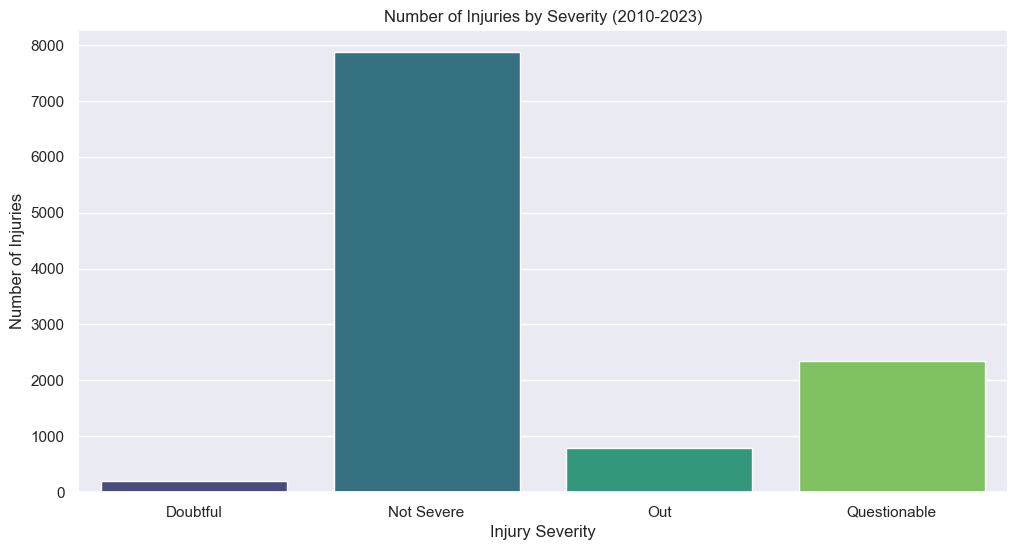

In [206]:
# Plot the injuries by severity exluding No Injury
injuries_by_severity = combined_data[combined_data['Severity'] != 'No Injury'].groupby('Severity')['Injury'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=injuries_by_severity.index, y=injuries_by_severity.values, palette='viridis')
plt.title('Number of Injuries by Severity (2010-2023)')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Injuries')

Now we will begin selecting the data for analysis

In [207]:
training_data = combined_data[(combined_data['play_type'].isin(['run','pass']))]
training_data = training_data.drop(columns=['Out', 'Doubtful', 'Questionable'])

In [208]:
y = training_data['Injury']

In [209]:
train_numeric = training_data[['week','qtr', 'down', 'ydstogo','yardline_100','spread_line',
                    'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback',
                    'qb_scramble','season','overtime', 'div_game', 'wind', 'temp', 'score_differential']]

train_str = training_data[['game_half',
                    'play_type',
                    'pass_length','pass_location',
                    'run_location', 'run_gap','weekday','roof', 
                    'surface','stadium', 'Severity']]

In [231]:
for col in train_numeric.columns:
    null_count = train_numeric[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

for col in train_str.columns:
    null_count = train_str[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

div_game: 44074
temp: 183945
wind: 183945
down: 1379
run_gap: 333374
run_location: 280718
roof: 44074
pass_location: 214816
pass_length: 214816
surface: 49223
weekday: 44074


Endode the categorical variables and scale the numerical variables

In [232]:
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pca = PCA()
le = LabelEncoder()
scaler = StandardScaler()
pipeline = make_pipeline(scaler, pca) 

for feat in train_str:
    ## Fill NaN values
    train_str[feat] = le.fit_transform(train_str[feat].astype(str))

for feat in train_numeric:
    train_numeric[feat].fillna(train_numeric[feat].mean(), inplace=True)

/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_9421/3756595513.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_str[feat] = le.fit_transform(train_str[feat].astype(str))
/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_9421/3756595513.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_str[feat] = le.fit_transform(train_str[feat].astype(str))
/var/folders/fv/6ssdmf5n3cs0c8kp8swwnx280000gn/T/ipykernel_9421/3756595513.py:13: SettingWithCopyWarning: 
A value is trying to 

In [233]:
combined_training_data = pd.concat([train_numeric, train_str], axis=1)
X_enc = pipeline.fit_transform(combined_training_data)
X_enc_dataset = pd.DataFrame(X_enc)
X_enc_dataset.columns = [x for x in combined_training_data.columns]

In [234]:
from sklearn.feature_selection import mutual_info_classif

ig = mutual_info_classif(X_enc, y, random_state=42)
ig

array([0.00818882, 0.03617978, 0.00837553, 0.00718598, 0.00983153,
       0.00969128, 0.03094899, 0.09872826, 0.01716547, 0.00903167,
       0.00766545, 0.00742991, 0.01068069, 0.01169209, 0.00748411,
       0.00982625, 0.01002683, 0.0076632 ])

In [235]:
# Create a dictionary to store the feature and its information gain
ig_dict = {}
for i in range(len(X_enc_dataset.columns)):
    ig_dict[X_enc_dataset.columns[i]] = ig[i]

In [244]:
ig_dict_sorted = dict(sorted(ig_dict.items(), key=lambda item: item[1], reverse=True))

# Select the top n features with the highest information gain
n = 15
selected_features = list(ig_dict_sorted.keys())[:n]

# Print the selected features
print('Selected Features:')
print(selected_features)

Selected Features:
['ydstogo', 'qb_dropback', 'down', 'run_gap', 'surface', 'pass_length', 'Severity', 'wind', 'play_type', 'qtr', 'run_location', 'div_game', 'shotgun', 'roof', 'weekday']


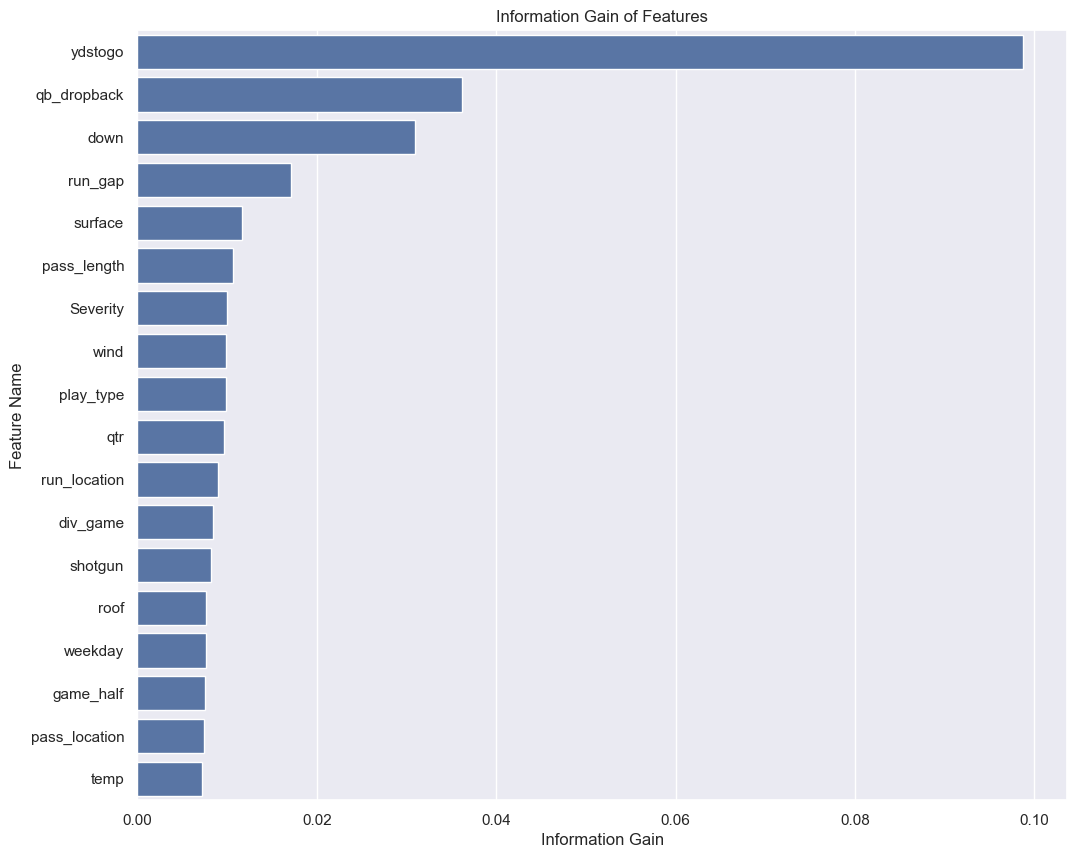

In [245]:
# Visualize the information gain of each feature
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x=list(ig_dict_sorted.values()), y=list(ig_dict_sorted.keys()))
plt.title('Information Gain of Features')
plt.xlabel('Information Gain')
plt.ylabel('Feature Name')
plt.show()

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_enc_dataset[selected_features], y, test_size=0.15, random_state=31)

In [257]:
from sklearn.linear_model import LinearRegression


linr = LinearRegression()
linr.fit(X_train, y_train)

LinearRegression()

In [258]:
#See the R-Squared
from sklearn.metrics import precision_score, recall_score


score = linr.score(X_test, y_test)
print("R-squared: {:.2f}".format(score))

#Now test the model
y_pred = linr.predict(X_test)
print('Training Set:', linr.score(X_train,y_train))
print('Test Set:', linr.score(X_test,y_test))

# Calculate the accuracy, precision, and recall scores
# print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred, average='macro')*100))
# print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred, average='macro')*100))


R-squared: 0.74
Training Set: 0.7232208113577665
Test Set: 0.7386939832090561


In [220]:
# pd.concat([train_numeric, train_str, y], axis=1).to_csv('../data/processed/NFL_verse_training_data.csv', index=False)